In [1]:
import numpy as np
from relax import Solver

#### Значения на границе и функции, определяющие начальное приближение

In [2]:
BOUND_VAL1 = 10.0
BOUND_VAL2 = 5.0

func1 = lambda x,y: (x**2 + y**2)/BOUND_VAL1
func2 = lambda x,y: x*0+y*0

#### Инициализируется сетка и начальные значения

In [3]:
mesh = Solver.make_mesh(1, 10)
init1 = Solver.eval_func(func1, mesh)
init2 = Solver.eval_func(func2, mesh)

#### 1. Граничные условия - 10 В на границе квадратной области

##### 1.1 Нулевое начальное приближение 

In [4]:
# Set 1st boundary values
bounds_1 = np.zeros(mesh[0].shape)
for i in xrange(len(bounds_1)):
    for j in xrange(len(bounds_1[i])):
        if i==0 or i==len(bounds_1)-1 or j==0 or j==len(bounds_1[i])-1:
            bounds_1[i][j] = BOUND_VAL1

74it [00:00, 3022.24it/s]               


Number of iterations: 74


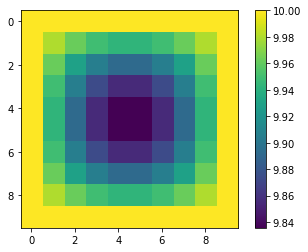

In [7]:
solver = Solver(mesh, init2, bounds_1)
results = solver.solve(0.01, True)

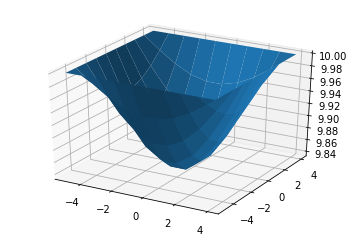

In [8]:
solver.show_values()

##### 1.2 Начальное приближение - поле $$U(\vec{r}) = \frac{1}{\vec{r}}$$

73it [00:00, 2981.43it/s]               


Number of iterations: 73


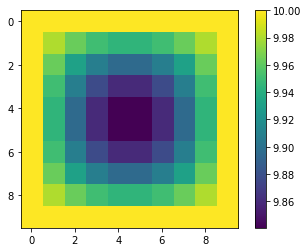

In [9]:
solver = Solver(mesh, init1, bounds_1)
results = solver.solve(0.01, True)

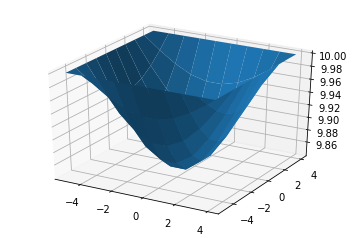

In [10]:
solver.show_values()

#### 2. Граничные условия - на границе значения 5 В, 10 В, 5 В, 10 В

In [11]:
# Set 2st boundary values
bounds_2 = np.zeros(mesh[0].shape)
for i in xrange(len(bounds_2)):
    for j in xrange(len(bounds_2[i])):
        if i==0 or i==len(bounds_2)-1:
            bounds_2[i][j] = BOUND_VAL1
        elif j==0 or j==len(bounds_2)-1:
            bounds_2[i][j] = BOUND_VAL2

##### 2.1 Нулевое начальное приближение 

70it [00:00, 3123.88it/s]               


Number of iterations: 70


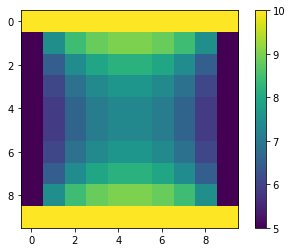

In [12]:
solver = Solver(mesh, init2, bounds_2)
results = solver.solve(0.01, True)

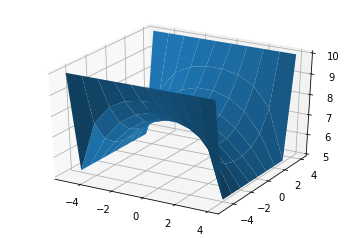

In [13]:
solver.show_values()

##### 2.2 Начальное приближение - поле $$U(\vec{r}) = \frac{1}{\vec{r}}$$

68it [00:00, 2647.97it/s]               


Number of iterations: 68


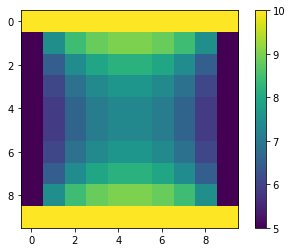

In [14]:
solver = Solver(mesh, init1, bounds_2)
results = solver.solve(0.01, True)

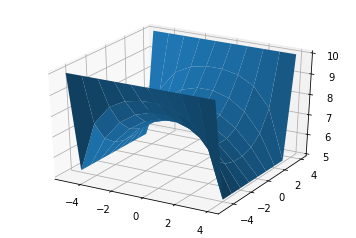

In [15]:
solver.show_values()

#### Решение с начальный приближением 5В в точке (5, 5)

In [16]:
init2 = Solver.eval_func(func2, mesh)
init2[5][5] = 5

80it [00:00, 3575.74it/s]               


Number of iterations: 80


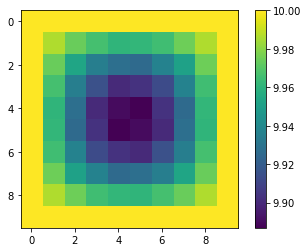

In [17]:
solver = Solver(mesh, init2, bounds_1)
results = solver.solve(0.01, True)

Такое начальное приближение по сути не отличается от нулевого приближения, так как уже на первой итерации, благодаря тому, что в соседних точках нули, значение в точек (5, 5) будет равно нуль